In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from Helper.ImportDatasetsFairness import log_crit_epsilons_network, networks
from Helper.ImportDatasetQuantiles import *

Loading...
Loaded!


# Steps
Try too make a smoother nonparametric method by using some of the interpolation given by numpy

# Plots for the 2 methods (Normal and Non parametric but smoother if possible)
1. Size of uncertainty over length of sample
2. Maybe show average uncertainty over sample legnth + with 95% CI
3. Show binary comparison results

## Size of uncertainty

In [59]:
from Method.QuantileUncertaintyCalculations import calculate_quantiles, get_quantile, get_quantile_normal_method_2
from Method.QuantileUncertaintyCalculations import *

def method_nonparam(samples):
    return get_quantile_nonparam(samples, 0.05)
def method_nonparam2(samples):
    return get_quantile_nonparam(samples, 0.05, normal_approx=True)

def method_param(samples):
    # Init
    quantiles = np.zeros((len(samples), 2))
    for i, sample in enumerate(samples):
        mean = np.mean(sample)
        std = np.std(sample)
        quantiles[i] = get_quantile_normal_method_2(sample, 0.05, mean, std)
    return quantiles

In [60]:
dat = calculate_quantiles([method_nonparam, method_nonparam2])

----------------- Network: mnist-net -----------------


100%|██████████| 840/840 [00:39<00:00, 21.34it/s]


----------------- Network: mnist-net_256x4 -----------------


100%|██████████| 840/840 [00:40<00:00, 20.74it/s]


----------------- Network: mnist_relu_4_1024 -----------------


100%|██████████| 840/840 [00:42<00:00, 19.70it/s]


In [77]:
# take method 1 from dat and put this in dat2
dat2 = {}

for network in dat:
    dat2[network] = [dat[network][1], np.zeros((n_samples, len(lens), 2))]  # Take method 1 (index 1) from dat
    

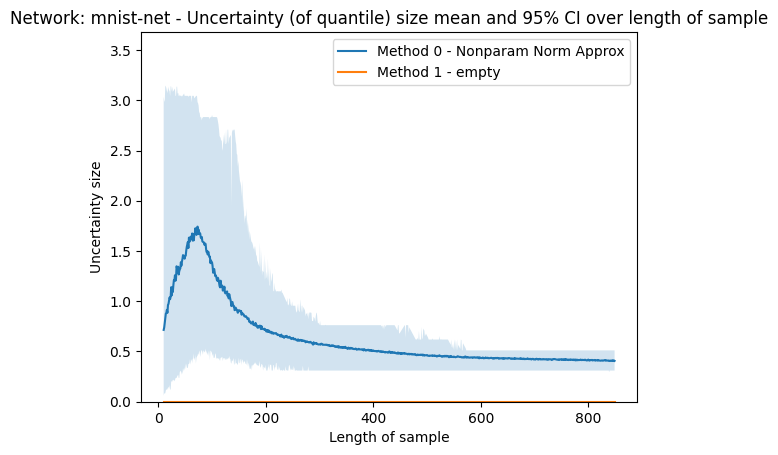

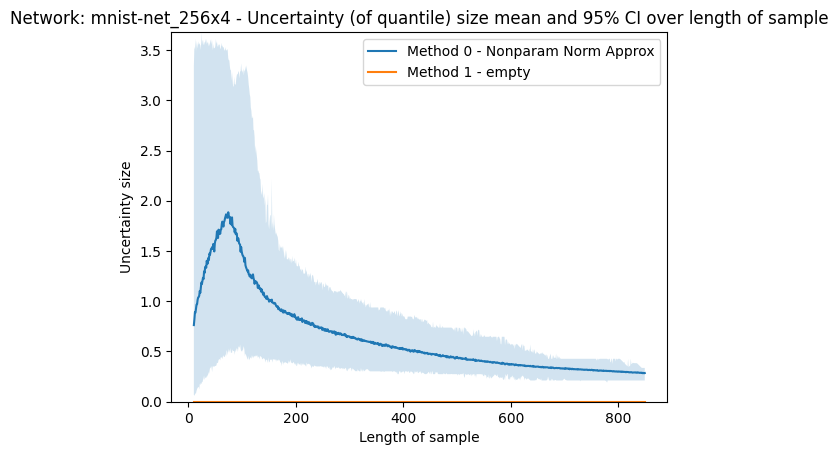

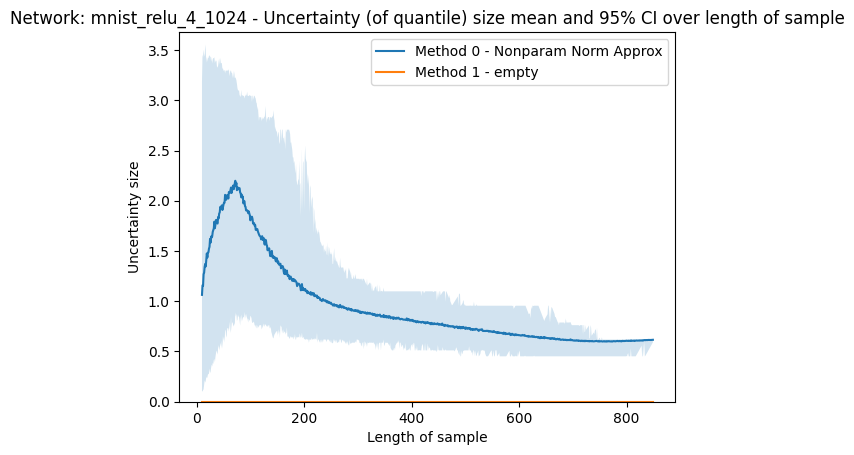

In [79]:
from Helper.Plotting import plot_uncertainty_size
# reload this module
import Helper.Plotting
import importlib
importlib.reload(Helper.Plotting)

figs, axs = plot_uncertainty_size(dat2, names = ['Nonparam Norm Approx', 'empty'])

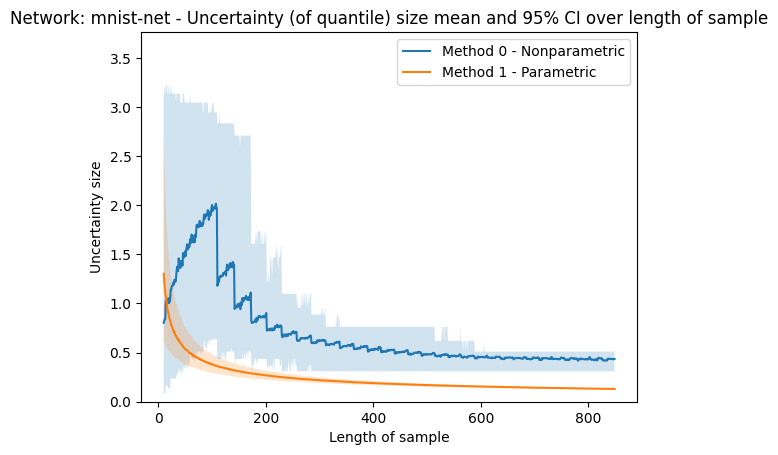

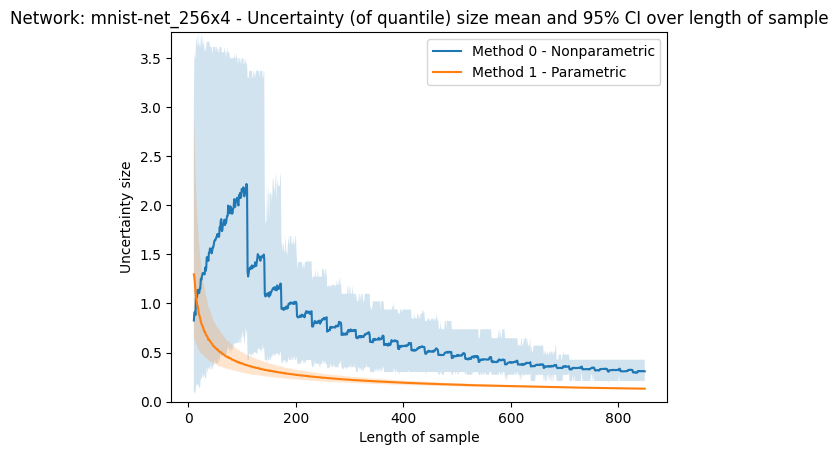

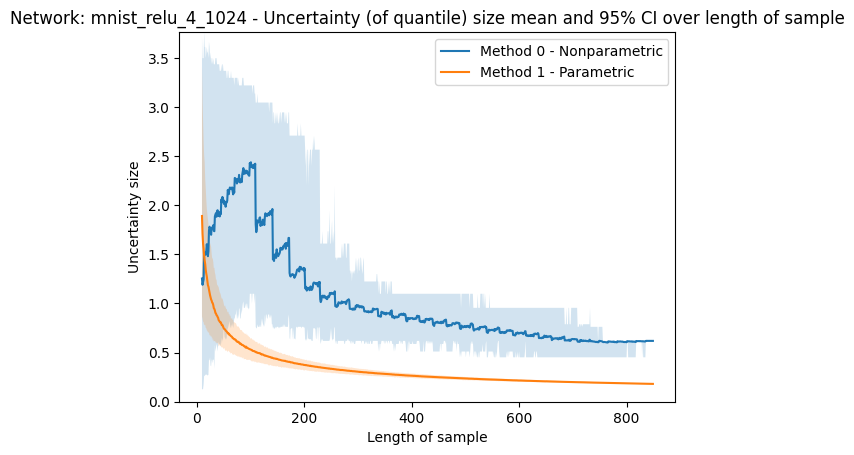

In [57]:
from Helper.Plotting import plot_uncertainty_size

figs, axs = plot_uncertainty_size(dat, names = ['Nonparametric', 'Parametric'])
